In [1]:
import cirq
import numpy as np
import sympy
from qiskit import *
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumRegister, ClassicalRegister
import matplotlib.pyplot as plt

from qiskit.visualization import *

import server
server = server.Server()

In [2]:
server.state()

{'team': 'Qnonymous',
 'totalAvgScore': 0.38813039399624766,
 'topVaultScores': [0.8,
  0.359,
  0.152,
  0,
  0,
  0.9230769230769231,
  0.04,
  0.002,
  0,
  0.8555,
  0.941,
  0.6404878048780488,
  0.7445],
 'probesRemaining': [34, 12, 15, 13, 17, 5, 13, 9, 19, 11, 10, 4, 1],
 'attacksRemaining': [36, 19, 19, 20, 19, 16, 19, 19, 20, 18, 16, 18, 18],
 'reminder': 'Vault index 0 is a test vault, and does not count towards your final score.'}

In [3]:
def probability(res, n):
    keys_as_int = sorted(map(int, res.keys()))
    ans = {}

    # Convert integers to binary representation in big endian
    binary_labels = [format(key, f'0{n}b') for key in keys_as_int]

    for i in range(n):
        for j in range(len(binary_labels)):
            if binary_labels[j][i] == '0':
                if i in ans:
                    ans[i] += res[str(keys_as_int[j])]

                else:
                    ans[i] = res[str(keys_as_int[j])]

    return ans

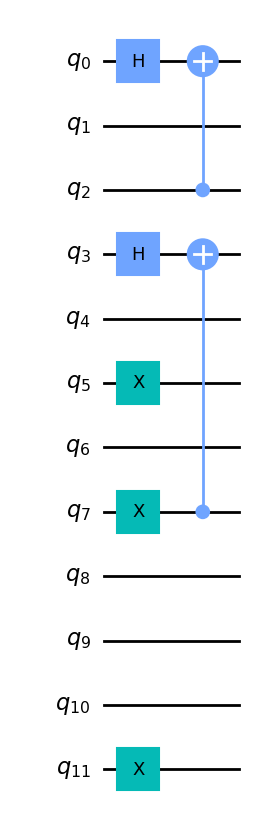

In [22]:
qc = QuantumCircuit(12)

qc.h(0)
qc.x(5)
qc.x(7)
qc.x(11)
qc.h(3)

qc.cx(2,0)
qc.cx(7,3)
qc.draw("mpl")

In [23]:
test_probe = qc.qasm()
print(test_probe)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[12];
h q[0];
x q[5];
x q[7];
x q[11];
h q[3];
cx q[2],q[0];
cx q[7],q[3];



In [24]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!Be careful about the Endian of returned histogram!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
res = server.probe(vault_index=4, circuit=test_probe)
print(res)

{'11': 0.005, '35': 0.005, '41': 0.01, '43': 0.005, '44': 0.005, '45': 0.005, '77': 0.005, '101': 0.005, '169': 0.005, '185': 0.005, '201': 0.005, '235': 0.005, '255': 0.005, '272': 0.005, '307': 0.005, '314': 0.005, '315': 0.01, '316': 0.005, '317': 0.005, '347': 0.005, '370': 0.005, '371': 0.005, '374': 0.005, '380': 0.005, '413': 0.005, '423': 0.005, '437': 0.005, '447': 0.005, '491': 0.005, '511': 0.005, '581': 0.005, '594': 0.005, '603': 0.005, '611': 0.005, '667': 0.005, '781': 0.005, '801': 0.005, '863': 0.005, '891': 0.005, '977': 0.005, '979': 0.005, '986': 0.005, '1035': 0.005, '1036': 0.005, '1043': 0.005, '1075': 0.005, '1099': 0.005, '1117': 0.005, '1127': 0.005, '1131': 0.005, '1150': 0.005, '1151': 0.005, '1169': 0.005, '1220': 0.005, '1253': 0.005, '1257': 0.005, '1292': 0.005, '1297': 0.01, '1305': 0.005, '1331': 0.005, '1335': 0.005, '1339': 0.01, '1436': 0.005, '1474': 0.005, '1477': 0.005, '1491': 0.005, '1502': 0.005, '1509': 0.005, '1547': 0.005, '1579': 0.005, '1

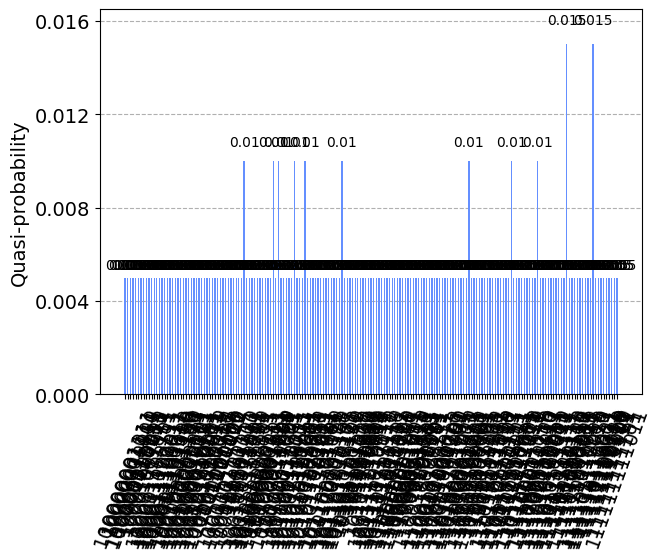

In [25]:
    binary_dict = {bin(int(key))[2:]: value for key, value in res.items()}
    plot_distribution(binary_dict)

In [26]:
res2 = {}
for key, val in binary_dict.items():
    if val > 0.005:
        res2[key] = val

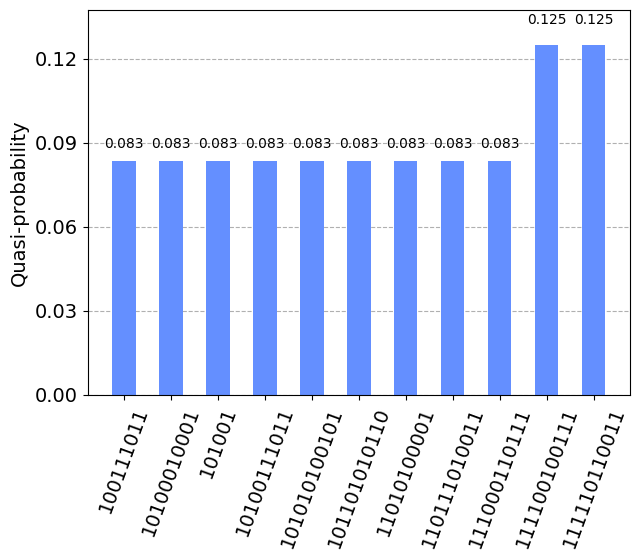

In [27]:
plot_distribution(res2, sort="asc")

In [11]:
probability(res2, 12)

{1: 0.035,
 2: 0.09,
 3: 0.09,
 4: 0.01,
 5: 0.02,
 6: 0.10499999999999998,
 7: 0.09499999999999999,
 8: 0.065,
 9: 0.04,
 10: 0.065,
 11: 0.060000000000000005}

In [12]:
server.state()

{'team': 'Qnonymous',
 'totalAvgScore': 0.3847970606629143,
 'topVaultScores': [0.8,
  0.359,
  0.152,
  0,
  0,
  0.9230769230769231,
  0,
  0.002,
  0,
  0.8555,
  0.941,
  0.6404878048780488,
  0.7445],
 'probesRemaining': [34, 12, 15, 14, 19, 5, 15, 10, 20, 11, 10, 4, 1],
 'attacksRemaining': [36, 19, 19, 20, 20, 16, 20, 19, 20, 18, 16, 18, 18],
 'reminder': 'Vault index 0 is a test vault, and does not count towards your final score.'}

In [19]:
server.attack(vault_index=4, circuit=test_probe)

{'score': 0, 'rawScore': 0, 'costFactor': 1}